## Initial exploration of the data from Instacart Market Basket.  ##

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as pl
import seaborn as sns
%matplotlib inline

# Read in files
aisles = pd.read_csv('aisles.csv')
departments =  pd.read_csv('departments.csv')
order_products_prior =  pd.read_csv('order_products__prior.csv')
order_products_train =  pd.read_csv('order_products__train.csv')
products = pd.read_csv('products.csv')
orders = pd.read_csv('orders.csv')

### When do people order?
Taking a look at when people order.

In [5]:
# Filter for only Prior data in the orders
orders_prior = orders.loc[orders['eval_set'] == 'prior']

### What day do they order?
People tend to order on the most on days 0 and 1. 

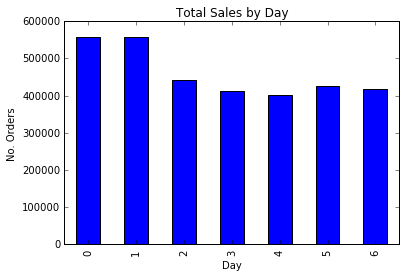

In [3]:
# Plot the days that people most likely order
orders_day = orders_prior.groupby(['order_dow']).size()
orders_by_day = orders_day.plot(kind='bar',title="Total Sales by Day")
orders_by_day.set_xlabel("Day")
orders_by_day.set_ylabel("No. Orders")

### What time of day do they order?
Order seem to be the most frequent between 9 am - 5 pm (regular business hours)

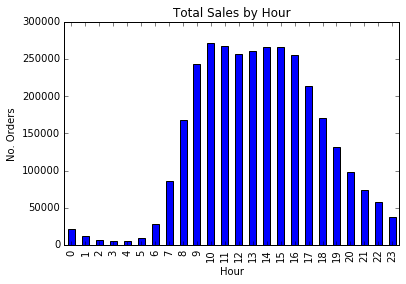

In [4]:
# Plot the hours people most likley order
orders_hour = orders_prior.groupby(['order_hour_of_day']).size()
orders_by_hour = orders_hour.plot(kind='bar',title="Total Sales by Hour")
orders_by_hour.set_xlabel("Hour")
orders_by_hour.set_ylabel("No. Orders")

### How much time do people wait between orders?
Most frequently reordered at 7 days and again at 30 days. Most reorders happened within a week.

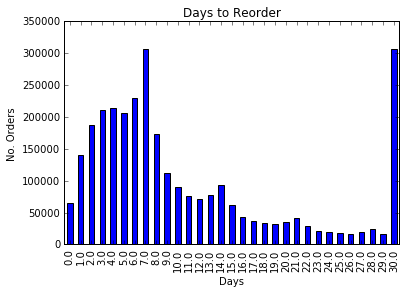

In [5]:
# Plot time to reorder
orders_reorder = orders_prior.groupby(['days_since_prior_order']).size()
orders_by_reorder = orders_reorder.plot(kind='bar',title="Days to Reorder")
orders_by_reorder.set_xlabel("Days")
orders_by_reorder.set_ylabel("No. Orders")

### How much many products do people order?
Most people order about 10 products.

10.0888834212


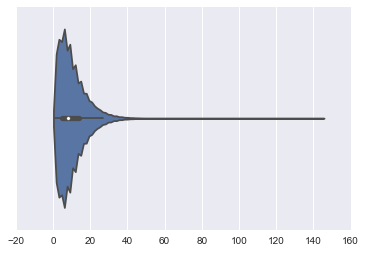

In [3]:
# Get the distibution number of products that are ordered
products_order = order_products_prior.groupby(["order_id"]).size()
products_by_order = sns.violinplot(x=products_order,scale="width")
print products_order.mean()

### What are the most frequently reordered items?
Fruits and vegtables seem to be the most reordered items

In [13]:
# Merge orders and products 
orders_prior_by_products = order_products_prior.merge(orders_prior)[['order_id','product_id','reordered']]
orders_grouped_product = orders_prior_by_products.groupby(["product_id"])["reordered"].aggregate({'Re-orders': 'count'}).reset_index()
orders_grouped_products = orders_grouped_product.merge(products).sort_values(by=['Re-orders'], ascending=False)
orders_grouped_products.head(20)

,product_id,Re-orders,product_name,aisle_id,department_id
24848,24852,472565,Banana,24,4
13172,13176,379450,Bag of Organic Bananas,24,4
21133,21137,264683,Organic Strawberries,24,4
21899,21903,241921,Organic Baby Spinach,123,4
47198,47209,213584,Organic Hass Avocado,24,4
47755,47766,176815,Organic Avocado,24,4
47615,47626,152657,Large Lemon,24,4
16793,16797,142951,Strawberries,24,4
26204,26209,140627,Limes,24,4
27839,27845,137905,Organic Whole Milk,84,16


### What deparments are frequently reordered from?
Produce, dairy and eggs

In [15]:
# Merge products and deparments
orders_prior_by_department = orders_prior_by_products.merge(products)
orders_grouped_deparment = orders_prior_by_department.groupby(["department_id"])["reordered"].aggregate({'Re-orders': 'count'}).reset_index()
orders_grouped_deparments = orders_grouped_deparment.merge(departments).sort_values(by=['Re-orders'], ascending=False)
orders_grouped_deparments.head(20)


,department_id,Re-orders,department
3,4,9479291,produce
15,16,5414016,dairy eggs
18,19,2887550,snacks
6,7,2690129,beverages
0,1,2236432,frozen
12,13,1875577,pantry
2,3,1176787,bakery
14,15,1068058,canned goods
19,20,1051249,deli
8,9,866627,dry goods pasta
